# Calculating Age and Distance of NGC3201 using Isochrones
## <font color=purple> Science!
<font color=purple> Written by Maria Funcich 

In [1]:
import os
import numpy 
import matplotlib.pyplot as plt 
from matplotlib.colors import LogNorm

## <font color=purple> HR Diagrams 

### <font color=purple> $\star$ Collecting the data set of magnitudes for each filter

In [2]:
cwd = os.getcwd()                         # saving current directory
os.chdir("../060_find_magnitudes/data")   # changing directory

file = open("magnitudes.csv", "r")        # opening the file (.csv) with all the calculated magnitudes

# reading lines of the document
lines = file.readlines()[1:]              # skipping the first line as it contains the heading (string)
lines_ = []
B = []                                    # creating empty arrays for each filter
V = []
R = []
I = []

for i in lines:
    lines_.append(i.strip())              # removing '\n' 
    
# note to self: data is represented as string
for x in lines_:
    B.append((x.split(',')[2]))           # adding all B magnitude data to array 'B'...
    V.append((x.split(',')[4]))
    R.append((x.split(',')[6]))
    I.append((x.split(',')[8]))
    
file.close()                              # close magnitudes.csv
os.chdir(cwd)                             # returning to the defined current directory

### <font color=purple> $\star$ Plotting HR diagram

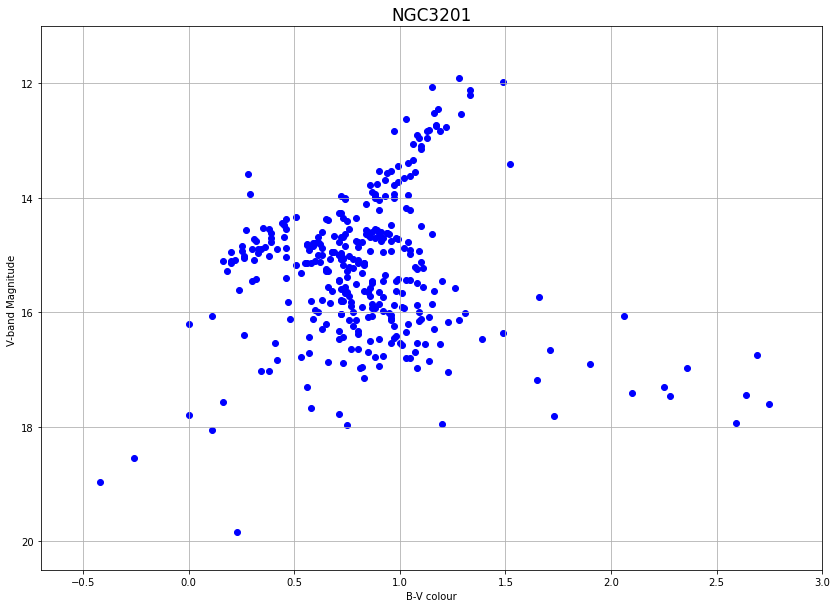

In [3]:
B_mag = []
V_mag = []

# removing rows that are empty (no magnitude for specific filter)
val = 0
for idx, a in enumerate(V):
    if V[idx] != '' and B[idx] != '':       # a null value is given by an empty string... therefore ignore ''
        B_mag.append(float(B[idx]))         # append the magnitude as a float value if both B and V mags are present
        V_mag.append(float(V[idx]))
        val = idx

# checking that it works and has only removed the necessary columns for both specified mags
#print(B_mag)
#print(V_mag)
#print(len(B_mag))
#print(len(V_mag))

BV = numpy.array(B_mag)-numpy.array(V_mag)  # colour: B minus V mags

# plotting HR 
plt.rcParams['figure.figsize'] = [14, 10]   # define plot size  

plt.axis([-0.7, 3, 20.5, 11])                 # axes ranges

ax = plt.gca()                          
ax.scatter(BV, V_mag, color = "b")

# axis labels
plt.rcParams.update({'font.size':14 })
plt.xlabel('B-V colour')          
plt.ylabel('V-band Magnitude ')
plt.title('NGC3201')
plt.grid(True)

plt.show()


#print(BV, V_mag)

<font color=purple> **Figure 1.** HR Diagram of NGC3201: is absent of a mainsequence, this is likely due to the fact that the faint stars weren't picked up
- We can see that there's a red giant branch, this works to our advantage as we can fit red giant isochrones to this.

### <font color=purple> $\star$ Creating function for magnitudes 

In [4]:
# function collects magnitudes for a pair of specific bands and only appends when magnitude is available for both
## 2 arguments --> band1: is minused from band2
##             --> band2: the band plotted on the y-axis

def magnitudes(band1, band2):
    band1_mag = []
    band2_mag = []

    val = 0
    for idx, a in enumerate(band1):
        if band1[idx] != '' and band2[idx] != '':
            band1_mag.append(float(band1[idx]))
            band2_mag.append(float(band2[idx]))
            val = idx
        
        colour = numpy.array(band1_mag) - numpy.array(band2_mag)
            
    return band2_mag, colour

In [5]:
# function creates colour magnitude diagrams (HR diagrams)
## 8 arguments --> band1: is minused from band2
##             --> band2: the band plotted on the y-axis
##             --> sb1, sb2: strings of the name band1 and band2... couldn't figure out how to implement the letter into a string :| 
##             --> x_min, x_max, y_min, y_max: axis scaling

def plot(band1, band2, sb1, sb2, x_min, x_max, y_min, y_max):
    mag = magnitudes(band1,band2)
    colour = mag[1]
    band2_mag = mag[0]

    # define plot size
    plt.rcParams['figure.figsize'] = [13, 10]

    plt.axis([x_min, x_max, y_min, y_max])                 # axes ranges
    plt.scatter(colour, band2_mag, color = 'b')            # scatter plot

    #ax = plt.gca()
    #ax.scatter(colour, band2_mag, color = "b")

    # axis labels
    plt.rcParams.update({'font.size':14 })
    plt.xlabel('{}-{} colour'.format(sb1,sb2))          
    plt.ylabel('{}-band Magnitude'.format(sb2))
    plt.grid(True)

    #plt.show()

### <font color=purple> $\star$ Plotting HR Diagrams using different bands

In [6]:
#plot(B,V,"B","V",-0.7, 3, 20.5, 11)

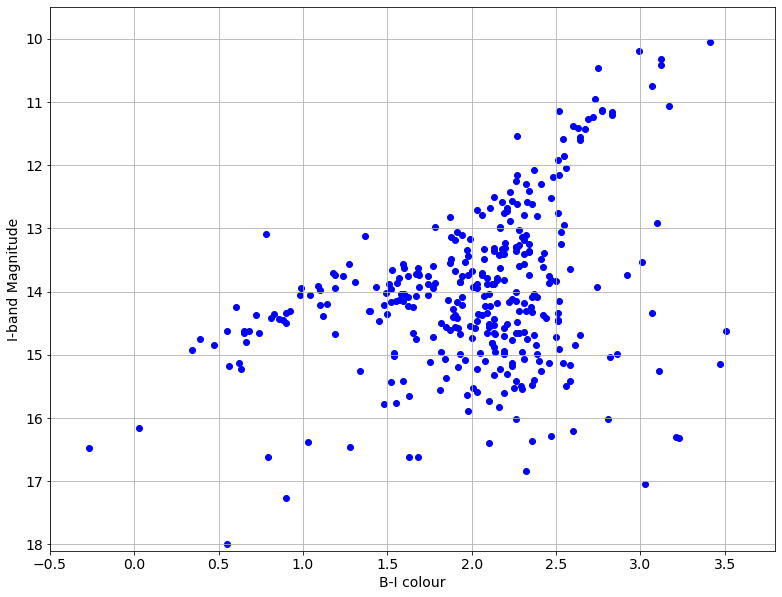

In [7]:
plot(B,I,"B","I",-0.5, 3.8, 18.1, 9.5)

<font color=purple> **Figure 2**: I-band magnitude as a function of (B-I) colour 

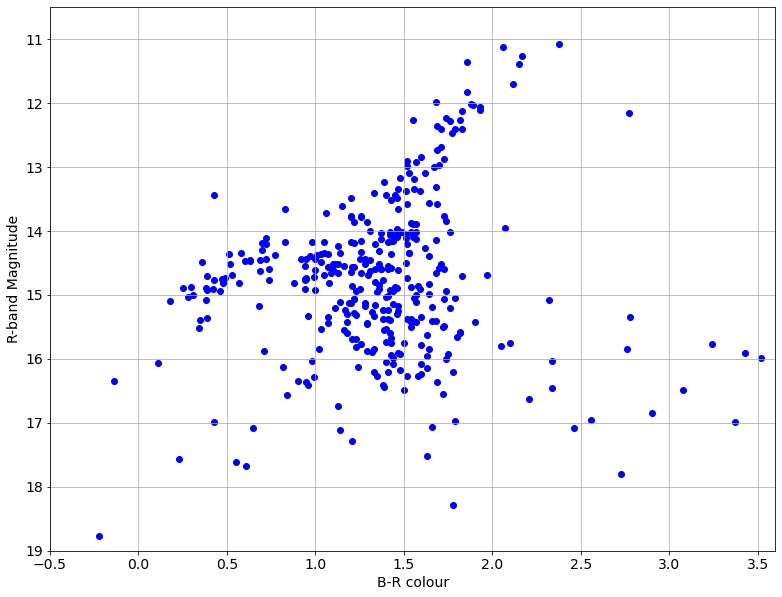

In [8]:
plot(B,R,"B","R",-0.5, 3.6, 19, 10.5)

<font color=purple> **Figure 3**: R-band magnitude as a function of (B-R) colour 

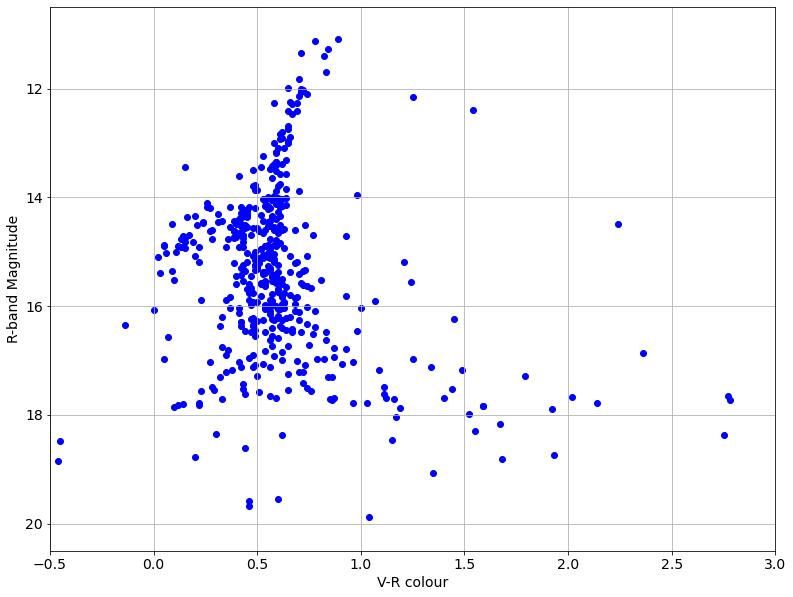

In [9]:
plot(V,R,"V","R",-0.5, 3, 20.5, 10.5)

<font color=purple> **Figure 4**: R-band magnitude as a function of (V-R) colour 

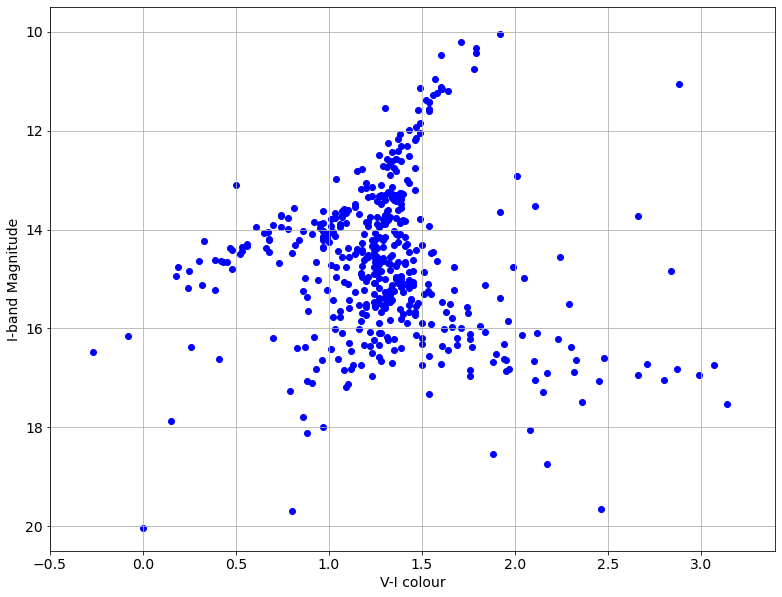

In [10]:
plot(V,I,"V","I",-0.5, 3.4, 20.5, 9.5)

<font color=purple> **Figure 5**: I-band magnitude as a function of (V-I) colour 

## <font color=purple> Giradi Isochrones

In [11]:
# function collects B and V magnitudes of the isochrone 
## 2 argument --> file_name: the file name of the isochrone
##            --> directory: directory of the isochrone

def isochrone(file_name, directory):
    os.chdir(directory)   
    fname = file_name

    f = open(fname,"r")
    lines = f.readlines()
    Bi = []                                     # empty arrays 
    Vi = []
    Ri = []
    Ii = []
    
    for x in lines:
        if x[0]!='#':
            Bi.append(float(x.split()[26]))    # B=C26, V=C27, R=C28, I=C29
            Vi.append(float(x.split()[27]))
            Ri.append(float(x.split()[28]))
            Ii.append(float(x.split()[29]))
    f.close()
    os.chdir(cwd)                              # return to 080_science directory

    #colour = numpy.array(band1_i)-numpy.array(band2_i)
    
    #print(Bi)
    #print(Vi)
    #print(Ri)
    #print(Ii)
    
    return Vi, Bi, Ri, Ii               #Vi=0, Bi=1, Ri=2, Ii=3

### <font color=purple> $\star$ Plotting an isochrone
<font color=purple> Generating a Girardi isochrone for specific ages using: http://stev.oapd.inaf.it/cgi-bin/cmd <br>
    
<font color=purple> Layden et al. gives an estimate of ~13Gyrs, therefore will use this value to approximate a model isochrone to calculate distance. Also using metallicity of [F/H] = -1.56 as given by kraft 2003.

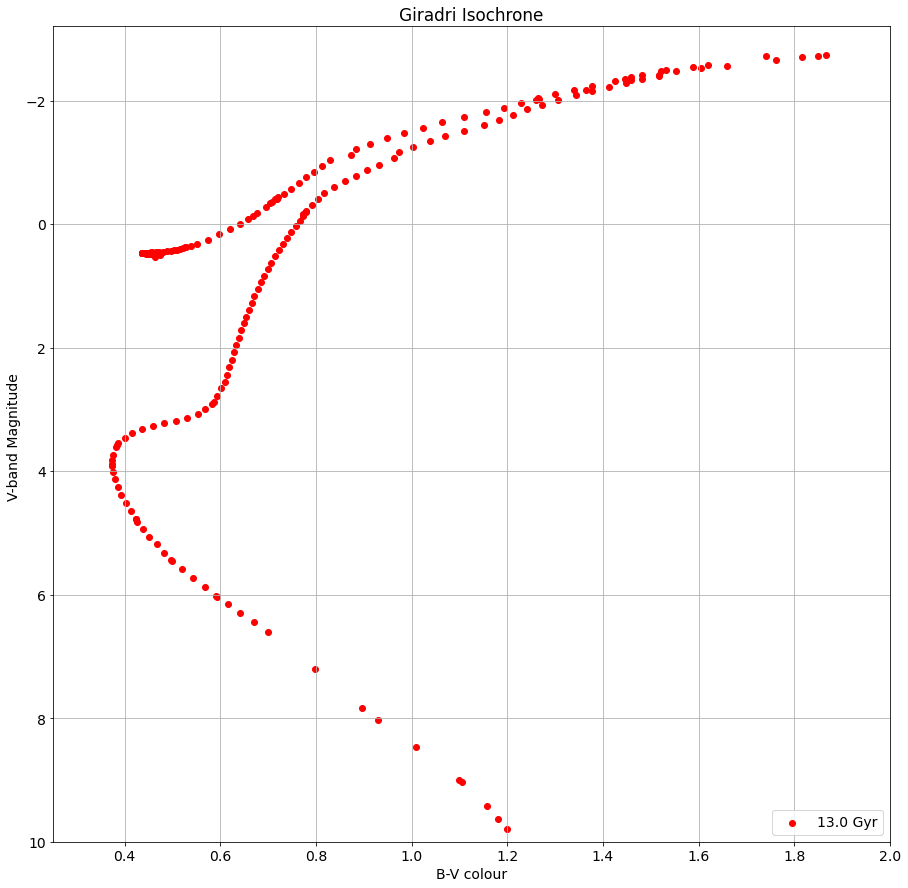

In [12]:
# plotting isochrones
iso = isochrone('13Gyr.txt', 'girardi isochrones/-1.56')
BVi = numpy.array(iso[1])-numpy.array(iso[0])

plt.rcParams['figure.figsize'] = [15, 15] # define plot size
plt.axis([0.25, 2, 10, -3.20])            # axes ranges

ax = plt.gca()
ax.scatter(BVi, iso[0], color = "r", label = "13.0 Gyr")

# axis labels
plt.rcParams.update({'font.size':14 })
plt.xlabel('B-V colour')          
plt.ylabel('V-band Magnitude ')
plt.title('Giradri Isochrone')
plt.legend(loc='lower right');
plt.grid(True)

plt.show()

<font color=purple> **Figure 6**: Giradi isochrone with a metallicity of [F/H] = -1.56 (kraft 2003) and an age of ~13Gyr

<font color=purple> Looks good, move on to plotting more...

### <font color=purple> $\star$ Plotting isochrone over NGC3201

<font color=purple> Using an estimated distance modulus that was calculated by 'eye' to fit isochrone over the HR diagram of NGC3201

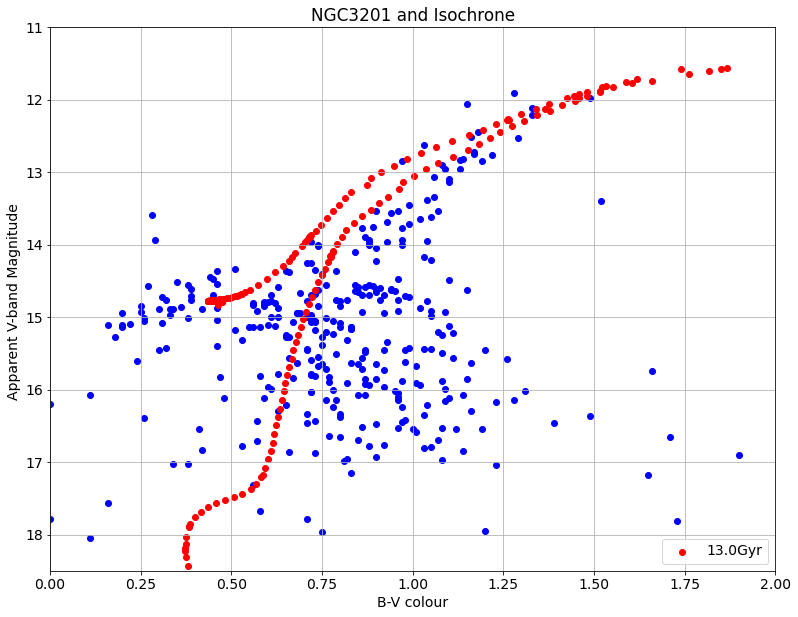

Distance: 7.244359600749905 kpc


In [13]:
plot(B,V,"B","V",0 , 2, 18.5, 11)              # plot of mag_V 
BVi = numpy.array(iso[1])-numpy.array(iso[0])
DM = 14.3                                      # distance modulus

V_DM = numpy.array(iso[0]) + DM                # adding distance modulus to the V magnitude of the isochrone
plt.scatter(BVi, V_DM, label='13.0Gyr', color = "r")        # scatter plot

# axis labels and grid
plt.xlabel('B-V colour')          
plt.ylabel('Apparent V-band Magnitude ')
plt.title('NGC3201 and Isochrone')
plt.grid(True)
plt.legend(loc='lower right')

plt.show()

# calculating distance
distance=(10.0**(DM/5))*10
print("Distance:", distance/1000, "kpc")

<font color=purple> **Figure 7**: Plotting 13.0Gyr isochrone over HR diagram and correcting with a distance modulus of 14.3, thus giving a distance of ~7.2kpc <br>

   
<font color=purple> 
    
- The fit of the isochrone is not too bad <br>
    
- The distance is ~2kpc greater than the expected literature values of ~5.1 ± 0.1 kpc (Monty et al. 2018). This is likely due to the dust/reddenning which we need to factor into our isochrones to get a true value.

### <font color=purple> $\star$ Plotting various isochrones

In [14]:
# function plots isochrones
## 5 arguments --> filename: file name of isochrone
##             --> DM: distance modulus
##             --> age: age of isochrone
##             --> Band1_index/Band2_index: choosing the band
##             --> ib1, ib2: name of band

def plot_iso(file_name, directory, DM, age, Band1_index, Band2_index, ib1, ib2):
    iso = isochrone(file_name, directory)
    colour = numpy.array(iso[Band1_index])-numpy.array(iso[Band2_index])

    Band_y_DM = numpy.array(iso[Band2_index])+DM
    ax = plt.gca()
    ax.scatter(colour, Band_y_DM, label = age)                         # scatter plot
    
    # axis labels
    plt.xlabel('{}-{} colour'.format(ib1,ib2))          
    plt.ylabel('{}-band Magnitude'.format(ib2))
    plt.title('NGC3201 and Isochrone')
    plt.grid(True)
    plt.legend(loc='lower left')

Distance: 7.244359600749905 kpc


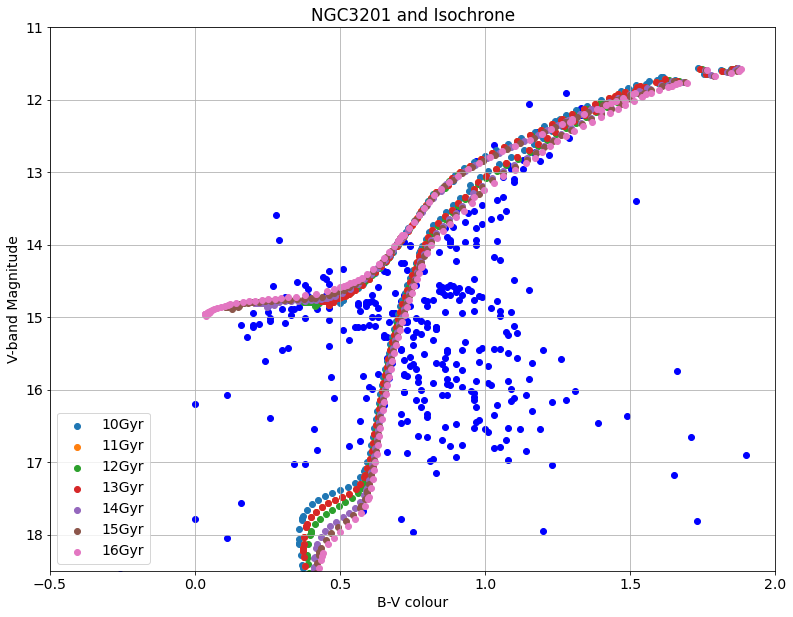

In [15]:
plot(B,V,"B","V",-0.5 , 2, 18.5, 11)
#plot_iso('100Myr.txt', 14, '100Myr', 1, 0, '', '')
#plot_iso('1Gyr.txt', 14, '1Gyr', 1, 0, '', '')
plot_iso('10Gyr.txt', 'girardi isochrones/-1.56', 14.3, '10Gyr', 1, 0, '', '')
plot_iso('11Gyr.txt', 'girardi isochrones/-1.56', 14.3, '11Gyr', 1, 0, '', '')
plot_iso('12Gyr.txt', 'girardi isochrones/-1.56', 14.3, '12Gyr', 1, 0, '', '')
plot_iso('13Gyr.txt', 'girardi isochrones/-1.56', 14.3, '13Gyr', 1, 0, '', '')
plot_iso('14Gyr.txt', 'girardi isochrones/-1.56', 14.3, '14Gyr', 1, 0, '', '')
plot_iso('15Gyr.txt', 'girardi isochrones/-1.56', 14.3, '15Gyr', 1, 0, '', '')
plot_iso('16Gyr.txt', 'girardi isochrones/-1.56', 14.3, '16Gyr', 1, 0, 'B', 'V')
#plot_iso('20Gyr.txt', 14, '20Gyr', 1, 0, 'B', 'V')

DM = 14.3
distance=(10.0**(DM/5))*10
print("Distance:", distance/1000, "kpc")

<font color=purple> **Figure 8**: Plotted isochrones from 10 to 16Gyr over NGC3201 using V-band against (B-V) colour, using [Fe/H] = -1.56 (Kraft & Ivans 2003)


<font color=purple> By plotting different aged isochrones we can get a good estimate of a good model for NGC3201.

<font color=purple>
    
- We can rule out 100Myr and 1Gyr as the red giant branches don't match as they are way off <br>
    
- Using the distance modulus of 14.3 we get a distance of ~ 7.2kpc (this does not take into account dust/reddening)

Distance: 6.918309709189362 kpc


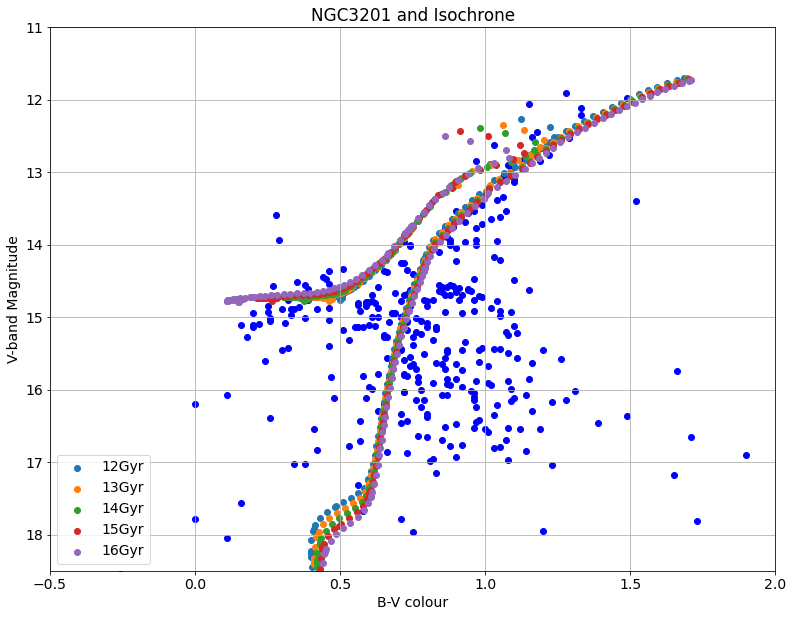

In [16]:
plot(B,V,"B","V",-0.5 , 2, 18.5, 11)
#plot_iso('100Myr.txt', 14, '100Myr', 1, 0, '', '')
#plot_iso('1Gyr.txt', 14, '1Gyr', 1, 0, '', '')
#plot_iso('10Gyr.txt', 'girardi isochrones/-1.42', 14.3, '10Gyr', 1, 0, '', '')
#plot_iso('11Gyr.txt', 'girardi isochrones/-1.42', 14.3, '11Gyr', 1, 0, '', '')
plot_iso('12Gyr.txt', 'girardi isochrones/-1.42', 14.2, '12Gyr', 1, 0, '', '')
plot_iso('13Gyr.txt', 'girardi isochrones/-1.42', 14.2, '13Gyr', 1, 0, '', '')
plot_iso('14Gyr.txt', 'girardi isochrones/-1.42', 14.2, '14Gyr', 1, 0, '', '')
plot_iso('15Gyr.txt', 'girardi isochrones/-1.42', 14.2, '15Gyr', 1, 0, '', '')
plot_iso('16Gyr.txt', 'girardi isochrones/-1.42', 14.2, '16Gyr', 1, 0, 'B', 'V')
#plot_iso('20Gyr.txt', 14, '20Gyr', 1, 0, 'B', 'V')

DM = 14.2
distance=(10.0**(DM/5))*10
print("Distance:", distance/1000, "kpc")

<font color=purple> **Figure 9**: Plotted isochrones from 10 to 16Gyr over NGC3201 using V-band against (B-V) colour, using [Fe/H] = -1.42 (Gonzalez & Wallerstein 1998)

## <font color=purple> Calculating distance by taking into account 'Dust'
    
### <font color=purple> $\star$ Calculating true distance modulus to add reddening to isochrones

   
<center> $(m - M)_0 = (m - M)_V - R_VE(B - V)$ </center>
    
<font color=purple> 
Extracting values from literature given in 06_NGC_3201_factsheet. Reddenning is found in **Table 1** on the factsheet. We are using the values: <br>
    
- $(m - M)_0$ our true distance modulus <br>
    
- $(m - M)_V$ distance modulus, calculated by eye through shifting the magnitudes of the isochrones <br>
    
- $R_V = 3.1$ <br>
    
- $E(B - V)$ is the extinction correction value (aka “reddening”) of the (B-V) colour <br>

We can determine our own redenning value by using the formula and Table 1 from 100_calculate_extinction we find that: 
- E(B-V) = 0.16 --> our value
    
    <center> **Table 1:** Extinction values for bands - refer to 100_calculate_extinction </center>
    
| Filter   |   Extinction [mag] |
|----------|--------------------|
| B        |               0.59 |
| V        |               0.43 |
| R        |               0.35 |
| I        |               0.25 |
    
We also want to compare with literature values  
    
- $E(B - V)$ = 0.25 as given by Monty et al. 2018 
- $E(B - V)$ = 0.14 as give by Alcaino 1976 
    
We can see that our value is closest to Alcaino

In [17]:
# function plots isochrones
## 10 arguments --> filename: file name of isochrone
##              --> DM: distance modulus
##              --> age: age of isochrone
##              --> Band1_index/Band2_index: choosing the band
##              --> ib1, ib2: name of band
##              --> reddening, reddening value: reddening name, reddening values 

def true_mod(file_name, directory, DM, age, band1_index, band2_index, ib1, ib2, reddening, reddening_value):
    iso = isochrone(file_name, directory)
    colour = numpy.array(iso[band1_index])-numpy.array(iso[band2_index])
    EBV = reddening_value                                             # reddening
    RV = 3.1*EBV                                                      # extinction value
    
    colour_M = colour+EBV                                             # adding reddening value to (B - V) colour
    band_M = numpy.array(iso[band2_index])+DM+RV                      # adding the distance modulus and R_V value to V magnitude

    # define plot size
    plt.rcParams['figure.figsize'] = [15, 15]
    plt.scatter(colour_M, band_M, label = age)                        # scatter plot
    
    textstr = '$[Fe/H]=-1.56$\n$E(X-Y)=%.2f$\n$(m-M)_0=%.2f$'%(reddening_value, DM)
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)

    # axis labels
    plt.rcParams.update({'font.size':14 })
    plt.xlabel('{}-{} colour'.format(ib1,ib2))          
    plt.ylabel('{}-band Magnitude'.format(ib2))
    plt.title('Giradri Isochrone')
    plt.legend(loc='upper right');
    plt.grid(True)
    
    plt.text(0.6, 0.05, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
    
    os.chdir("girardi plots")   # changing directory
    plt.savefig('{}-{} colour E({}-{}) {}'.format(ib1,ib2, ib1, ib2, reddening))
    os.chdir(cwd)
    
    # calculate new distance and print
    distance=(10.0**(DM/5))*10
    print("Distance:", distance/1000, "kpc")

Distance: 5.470159628939717 kpc
Distance: 5.470159628939717 kpc
Distance: 5.470159628939717 kpc


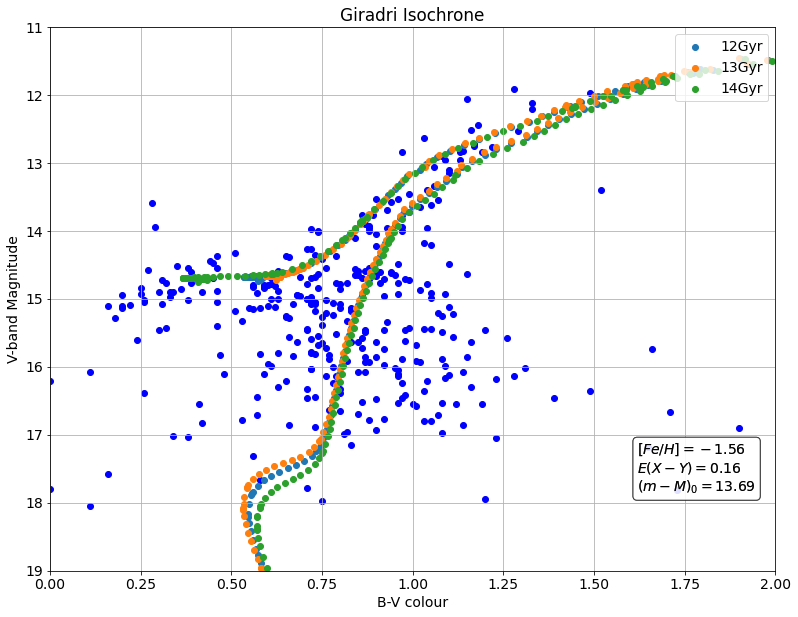

In [18]:
# our calculated value of reddening 
EBV = 0.16
RV = 3.1*EBV
plot(B,V,"B","V",0 , 2, 19, 11)     # plotting HR diagram
true_mod('12Gyr.txt', 'girardi isochrones/-1.56', 13.69, '12Gyr', 1, 0, '', '', '',0.16)    # plotting isochrones of different ages
true_mod('13Gyr.txt', 'girardi isochrones/-1.56', 13.69, '13Gyr', 1, 0, '', '', '', 0.16)
true_mod('14Gyr.txt', 'girardi isochrones/-1.56', 13.69, '14Gyr', 1, 0,  'B', 'V', 'Calculated', 0.16)


 <font color=purple> **Figure 10**:  Reddened Giradi Isochrones of ages 12, 13 and 14Gyrs. Reddening value used: $E(B - V) = 0.16$ giving a new $(m - M)_V = 13.69$ <br>
We get a distance of 5.5 kpc $\pm$ 0.2
Our calculation for reddening fits the isochrone well :) I'm happy with this! Time to try literature value to compare.

<font color=purple> 
### $\star$ Using literature reddening values

Distance: 4.365158322401657 kpc
Distance: 4.365158322401657 kpc
Distance: 4.365158322401657 kpc


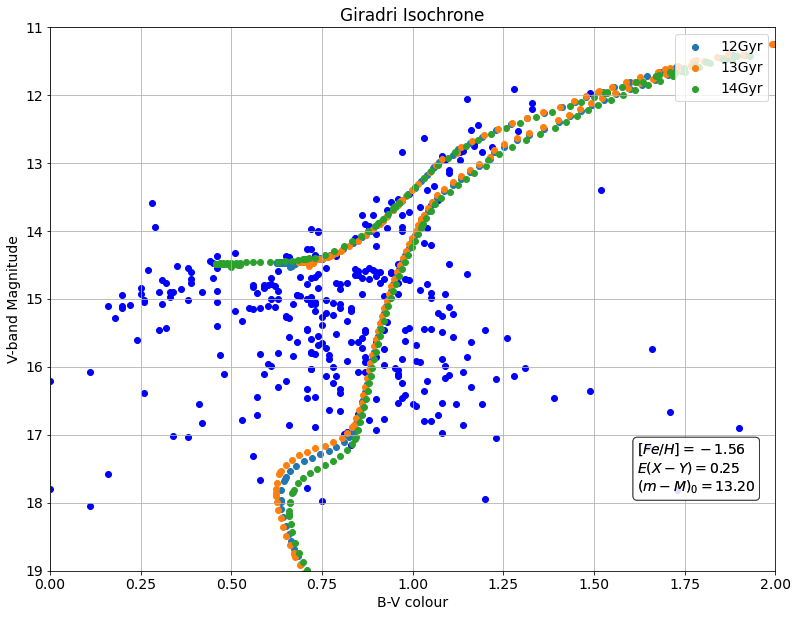

In [19]:
# Monty et al. 
plot(B,V,"B","V",0 , 2, 19, 11)

true_mod('12Gyr.txt', 'girardi isochrones/-1.56', 13.2, '12Gyr', 1, 0, '', '', '', 0.25)
true_mod('13Gyr.txt', 'girardi isochrones/-1.56', 13.2, '13Gyr', 1, 0, '', '', '', 0.25)
true_mod('14Gyr.txt', 'girardi isochrones/-1.56', 13.2, '14Gyr', 1, 0,  'B', 'V', 'Monty', 0.25)


 <font color=purple> **Figure 11**:  Reddened Giradi Isochrones of ages 12, 13 and 14Gyrs. Reddening value used: $E(B - V) = 0.25$ giving a new $(m - M)_V = 13.2$ <br>
    
<font color=purple> Judging from this fitting, we can see that the shape of the red giant and horizontal branch don't line up very well. Looks like the magnitude colour needs to be shifted to the right to fit well...  However, the new distance calculated is ~4.4 kpc, this is at least near the literature values given in **Table 1** of the fact sheet. 

<font color=purple> 
Changing the Distance modulus to now fit the 'reddened' isochrone magnitudes <br>
    
 - The modulus now goes up by ~1 compared to the non reddened isochrones

Distance: 5.370317963702527 kpc
Distance: 5.370317963702527 kpc
Distance: 5.370317963702527 kpc


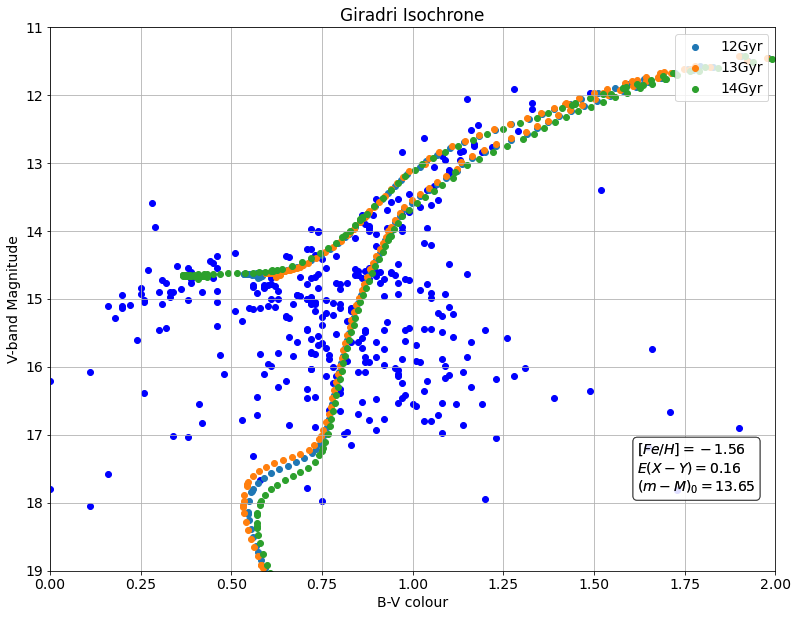

In [20]:
# Alcaino 1976 
plot(B,V,"B","V",0 , 2, 19, 11)
true_mod('12Gyr.txt', 'girardi isochrones/-1.56', 13.65, '12Gyr', 1, 0, '', '', '', 0.16)
true_mod('13Gyr.txt', 'girardi isochrones/-1.56', 13.65, '13Gyr', 1, 0, '', '', '', 0.16)
#true_mod('16Gyr.txt', 'girardi isochrones/-1.56', 13.65, '16Gyr', 1, 0, '', '', '', 0.16)
true_mod('14Gyr.txt', 'girardi isochrones/-1.56', 13.65, '14Gyr', 1, 0,  'B', 'V', 'Alcaino', 0.16)

<font color=purple> **Figure 12**:  Reddened Giradi Isochrones of ages 12, 13, 14Gyr. Reddening value used: $E(B - V) = 0.14$ giving a new $(m - M)_V = 13.65$

   
<font color=purple> The value for $E(B-V)$ given by Alcaino 1976 found in **Table 1** makes a better fit for the asymptotic giant branch, however, it's horizontal branch doesn't line up as well as our calculated value. We get a distance value of ~5.4 kpc.
    
- Note that the value is the same to Alcaino 1976 value of ~5.4 kpc

## <font color=purple> NOTES
<font color=purple>

- Found that using a reddening value of 0.16 gives a more accurate shape to our isochrones when fitting on to our NGC3201 data
- Age of NGC3201 is ~ 12 to 14Gyr  <br>
- Distance ~5.5kpc, E(B-V)=0.16

# EXTENSION

## <font color=purple> Using data from Carrol and Ostile appendix to estimate Age and Distance

<font color=purple> 
### $\star$ Distance

<font color=purple> NOTE! No MSTO therefore must rely on upper limit

Conversation with Michael </font>
<font color=blue> "The bluest red giant stars must be redder than the main sequence turn off. So that provides an upper limit on the main sequence turn off B-V colour and age.

The faintest red giant branch stars that you can reliably see are about B-V~0.8. 

This means the main sequence turn off is bluer than B-V~0.8. 
This provide a crude upper limit on the age. 
T = 10^10 years * M / L "

Calculating distance using formula:

<center> $m - M_V = 5\log{10}{\frac{d}{10pc}}$ </center>

Rearranging to find d (distance):

<center> $d = 10^\frac{m - M_V}{5}10$ </center>

<font color=purple> Must remove extinction value from NGC 3201! Finding an approximate upper limit on the main sequence turn off B-V colour. We see that this upper limit is ~ 0.70. We will take a range between 0.70 and 0.73 as we don't get many values using 0.70.

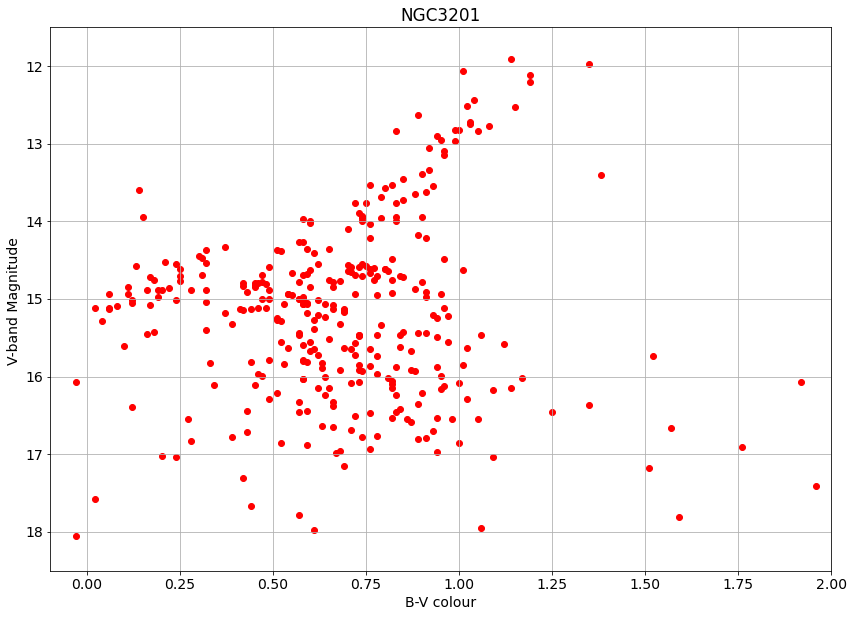

In [21]:
#plot(B,V,"B","V",0 , 2, 18, 12)            # comparing to reddened data
EBV = 0.14                                  # reddening
RV = 3.1*EBV

BV = numpy.array(B_mag)-numpy.array(V_mag)  # colour: B minus V mags
BVV_M = BV-EBV                              # adding reddening value to (B - V) colour                  

# plotting HR 
plt.rcParams['figure.figsize'] = [14, 10]   # define plot size  

plt.axis([-0.1, 2, 18.5, 11.5])             # axes ranges

ax = plt.gca()                          
ax.scatter(BVV_M, V_mag, color = "red")     # scatter plot

# axis labels
plt.rcParams.update({'font.size':14 })
plt.xlabel('B-V colour')          
plt.ylabel('V-band Magnitude ')
plt.title('NGC3201')
plt.grid(True)

plt.show()

<font color=purple> **Figure 13**:  Dereddened CMD NGC 3201 plotted V-band magnitude against B-V colour

In [22]:
import numpy as np

np.where(np.logical_and(BVV_M>=0.70, BVV_M<=0.73)) # finding index of B-V values between 0.70 and 0.73

(array([ 77, 112, 113, 117, 159, 200, 209, 236, 243, 253, 268, 281, 285,
        292, 305, 327]),)

In [23]:
#print(B_mag, V_mag,BV)       # from Figure 1

apparent_mag_V = []           # array for apparent mag
BV_colour = []

idx = [ 77, 112, 113, 117, 159, 200, 209, 236, 243, 253, 268, 281, 285,
        292, 305, 327]                             # index values in an array

# takes the index values in idx into V_mag to find corresponding apparent magnitude value
for i in idx:
    BV_colour.append(BVV_M[i])
    apparent_mag_V.append(V_mag[i])
    
# list of m_v values with regards to our upper limit B-V ~ 0.75 (minus the extinction value)    
print(apparent_mag_V, BV_colour)

[15.92, 13.77, 14.93, 14.59, 13.89, 16.51, 16.08, 16.69, 15.72, 14.69, 15.64, 15.47, 14.65, 15.57, 15.46, 15.85] [0.7299999999999992, 0.7200000000000012, 0.7199999999999994, 0.7099999999999996, 0.7299999999999992, 0.7199999999999994, 0.7100000000000014, 0.7099999999999979, 0.7199999999999976, 0.7200000000000012, 0.7099999999999979, 0.7299999999999992, 0.7099999999999996, 0.7199999999999994, 0.7299999999999974, 0.7299999999999992]


<font color=purple> Calculating absolute magnitude using the formula calculated by plotting C&O values... found in the excel file 080_science/C&O/C&O data

In [24]:
absolute_mag = -16.4563*numpy.array(BV_colour)**6 + 80.6362*numpy.array(BV_colour)**5 - 143.071*numpy.array(BV_colour)**4 + 114.007*numpy.array(BV_colour)**3 - 41.5886*numpy.array(BV_colour)**2 + 11.7919*numpy.array(BV_colour) + 1.09739
print(absolute_mag)

distance = 10**(((apparent_mag_V - absolute_mag)/5))*10
print(distance)
print("Apparent Magnitude:",apparent_mag_V)

print('Min:', np.min(distance))
print('Max:', np.max(distance))
print('Mean:', np.mean(distance))
print('Median:', np.median(distance))
print('Standard Deviation:', np.std(distance))

[5.48998593 5.44206437 5.44206437 5.39300217 5.48998593 5.44206437
 5.39300217 5.39300217 5.44206437 5.44206437 5.39300217 5.48998593
 5.39300217 5.44206437 5.48998593 5.48998593]
[1218.99749817  463.0065401   789.92730406  690.87514048  478.63319392
 1635.26117468 1372.14360504 1817.1867684  1136.54628201  707.2730754
 1120.46827884  990.83836564  710.23090438 1060.68670574  986.28587688
 1180.32828432]
Apparent Magnitude: [15.92, 13.77, 14.93, 14.59, 13.89, 16.51, 16.08, 16.69, 15.72, 14.69, 15.64, 15.47, 14.65, 15.57, 15.46, 15.85]
Min: 463.00654010312553
Max: 1817.1867684008957
Mean: 1022.4180623803223
Median: 1025.7625356922301
Standard Deviation: 369.8750229420776


<font color=purple> YIKES! Values are less than 2kpc, the greatest distance is ~ 1773 kpc, this is ~ 3.5 kpc away from the value we calculated using the theoretical isochrones! Thus being ~2kpc away from literature. tandard deviation is ~400 kpc, we will take this as our uncertainity.
    
We get a lower bound distance of d > 1 $\pm$ 0.4 kpc, this is reasonable as it is an inequality but it is fairly low

<font color=purple> 
### $\star$ Age

<font color=purple> 
To calculate age we use the relation that $Age = M^{-2.5}$, using the upper limit of B-V ~ 0.75:
    
<center> $T = 10Gyrs * (\frac{M}{M_0})^{-2.5}$ </center>

We need to retrieve Mass and Luminosity values from C&O. Since some of the values are not present, we must plot the values (same as M_V as above).

In [25]:
# calculating Mass with respect to colour (B-V)
M_Mo = 5.44533*numpy.array(BV_colour)**6 - 28.2142*numpy.array(BV_colour)**5 + 55.3015*numpy.array(BV_colour)**4 - 51.8115*numpy.array(BV_colour)**3 + 25.2711*numpy.array(BV_colour)**2 - 8.09895*numpy.array(BV_colour) + 2.79172
print(M_Mo)

# L_Lo = 29.7125*numpy.array(BV_colour)**6 - 191.196*numpy.array(BV_colour)**5 + 493.866*numpy.array(BV_colour)**4 - 656.485*numpy.array(BV_colour)**3 + 478.054*numpy.array(BV_colour)**2 - 185.054*numpy.array(BV_colour) + 31.8913
# print(L_Lo)             # Whoops... did not need luminosity value

T = 10*(M_Mo)**(-2.5)     # calculating age
print(T, 'Gyr')

print('Min:', np.min(T))
print('Max:', np.max(T))
print('Mean:', np.mean(T))
print('Median:', np.median(T))
print('Standard Deviation:', np.std(T))

[0.87061379 0.88351674 0.88351674 0.89682155 0.87061379 0.88351674
 0.89682155 0.89682155 0.88351674 0.88351674 0.89682155 0.87061379
 0.89682155 0.88351674 0.87061379 0.87061379]
[14.13956816 13.62897023 13.62897023 13.12909881 14.13956816 13.62897023
 13.12909881 13.12909881 13.62897023 13.62897023 13.12909881 14.13956816
 13.12909881 13.62897023 14.13956816 14.13956816] Gyr
Min: 13.129098813522189
Max: 14.139568162948937
Mean: 13.632322266881834
Median: 13.628970231292254
Standard Deviation: 0.3994315204368267


<font color=purple>  This suggests that NGC 3201 upper limit age is ~ 13.6 ± 0.4 kpc. However, this calculation is a very crude representation hence why we see that it's almost as old a the milky way!

<font color=purple> 
### $\star$ Fitting isochrones to (V - I) colour of NGC 3201


Using extinction value provided on **Table 1** 

Comparing colour HR diagrams:
(B - V)
(B - R)
(B - I)
(V - R)
(V - I)
(R - I)

Distance: 6.6069344800759575 kpc
Distance: 6.6069344800759575 kpc
Distance: 6.6069344800759575 kpc


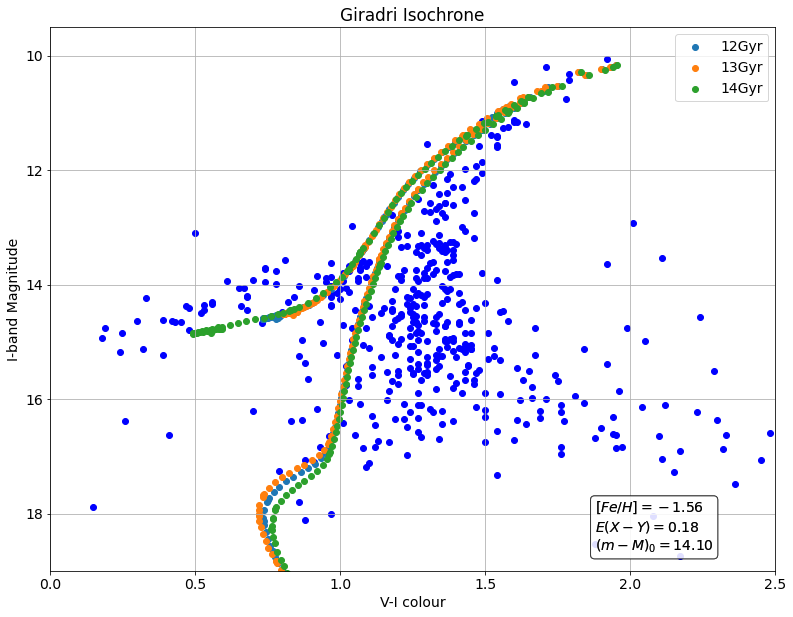

In [26]:
#Vi=0, Bi=1, Ri=2, Ii=3
# E(V-I) = 0.18  --> calculated from table 1
plot(V,I,"V","I",0, 2.5, 19, 9.5)

true_mod('12Gyr.txt', 'girardi isochrones/-1.56', 14.1, '12Gyr', 0, 3, '', '', '', 0.18)
true_mod('13Gyr.txt', 'girardi isochrones/-1.56', 14.1, '13Gyr', 0, 3, 'V', 'I', '', 0.18)
true_mod('14Gyr.txt', 'girardi isochrones/-1.56', 14.1, '14Gyr', 0, 3, 'V', 'I', 'Calculated', 0.18)

 <font color=purple> **Figure 14**:  Reddened Giradi Isochrones of ages 12, 13 and 14Gyrs. Reddening value used: $E(V - I) = 0.18$ thus a distance of d = 6.6 kpc <br>

    
Our calculated E(V-I) = 0.18 lacks the shape of our HR diagram

Distance: 6.6069344800759575 kpc
Distance: 6.6069344800759575 kpc
Distance: 6.6069344800759575 kpc


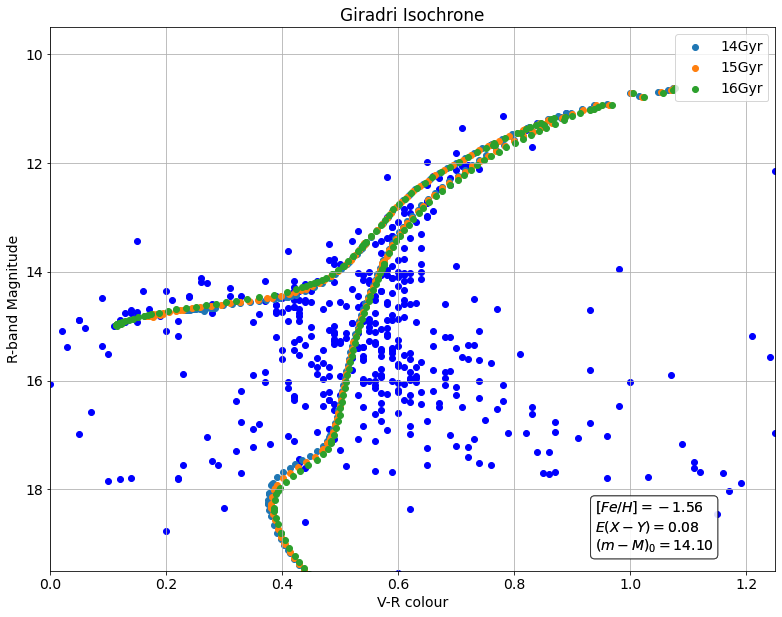

In [27]:
# E(V-R) = 0.08 --> calculated from table 1
plot(V,R,"V","R",0, 1.25, 19.5, 9.5)
#true_mod('12Gyr.txt', 'girardi isochrones/-1.56', 14.1, '12Gyr', 0, 2, '', '', '', 0.08)
#true_mod('13Gyr.txt', 'girardi isochrones/-1.56', 14.1, '13Gyr', 0, 2, '', '', '', 0.08)
true_mod('14Gyr.txt', 'girardi isochrones/-1.56', 14.1, '14Gyr', 0, 2, 'V', 'R', 'Calculated', 0.08)
true_mod('15Gyr.txt', 'girardi isochrones/-1.56', 14.1, '15Gyr', 0, 2, 'V', 'R', 'Calculated', 0.08)
true_mod('16Gyr.txt', 'girardi isochrones/-1.56', 14.1, '16Gyr', 0, 2, 'V', 'R', 'Calculated', 0.08)

 <font color=purple> **Figure 15**:  Reddened Giradi Isochrones of ages 14, 15 and 16Gyrs. Reddening value used: $E(V - R) = 0.08$ thus a distance of d = 6.6 kpc <br>

Distance: 5.011872336272725 kpc
Distance: 5.011872336272725 kpc
Distance: 5.011872336272725 kpc


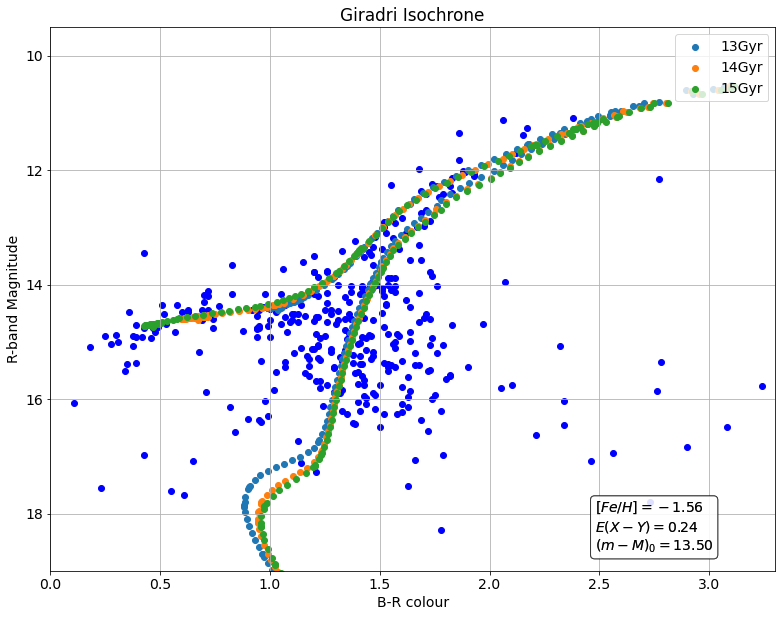

In [28]:
# E(B-R) = 0.24  --> calculated from table 1
plot(B,R,"B","R",0, 3.3, 19, 9.5)
true_mod('13Gyr.txt', 'girardi isochrones/-1.56', 13.5, '13Gyr', 1, 2, '', '', '', 0.24)
true_mod('14Gyr.txt', 'girardi isochrones/-1.56', 13.5, '14Gyr', 1, 2, 'B', 'R', '', 0.24)
true_mod('15Gyr.txt', 'girardi isochrones/-1.56', 13.5, '15Gyr', 1, 2, 'B', 'R', 'Calculated', 0.24)

 <font color=purple> **Figure 16**:  Reddened Giradi Isochrones of ages 13, 14 and 15Gyrs. Reddening value used: $E(B - R) = 0.24$ thus a distance of d = 5.0 kpc <br>

Distance: 4.5708818961487525 kpc
Distance: 4.5708818961487525 kpc
Distance: 4.5708818961487525 kpc


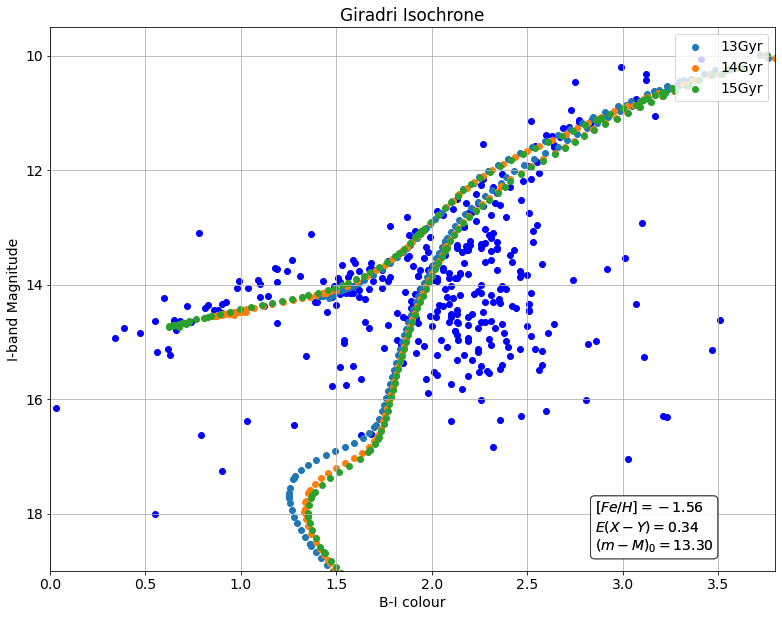

In [29]:
# E(B-I) = 0.34 --> calculated from table 1
plot(B,I,"B","I",0, 3.8, 19, 9.5)
true_mod('13Gyr.txt', 'girardi isochrones/-1.56', 13.3, '13Gyr', 1, 3, '', '', '', 0.34)
true_mod('14Gyr.txt', 'girardi isochrones/-1.56', 13.3, '14Gyr', 1, 3, '', '', '', 0.34)
true_mod('15Gyr.txt', 'girardi isochrones/-1.56', 13.3, '15Gyr', 1, 3, 'B', 'I', 'Calculated', 0.34)

<font color=purple> **Figure 17**:  Reddened Giradi Isochrones of ages 13, 14 and 15Gyrs. Reddening value used: $E(B - I) = 0.34$ thus a distance of d = 4.6 kpc <br>

# Notes
- Our uncertainty for distant modulus is $\pm 0.1$ by taking multiple measurements and finding the mean
- Uncertainty for age is the difference in upper and lower bound, therefore it will be $\pm 1$ Gyr

- Using different colour indices for the HR diagram shows a larger spreader in B - I and B - R 
- V - I reddening gives a bad fit, not a great addition to our results as the uncertainity is too great
- None of the bands could pick up mainsequence stars, hence we can conclude that the telescope was hindering the performance of our science